![@mikegchambers](../images/header.png)

# This is a Jupyter Notebook

Hello, welcome to this Jupyter notebook.  

Jupyter notebooks could be described as the wiki of scripting.  You will see in this notebook, that it's divided into cells.  Each cell contains either 'text' (like this one), or 'code'.   What makes a Jupyter notebook special is that you can run the code right here in the notebook. 

Often, and in this case, Jupyter notebook code is written in Python (but it doesn't have to be).

Take a look at the example in the next cell:

In [2]:
print("Hello I am Python!")

Hello I am Python!


Text cells are written using 'markdown' syntax.  So that means you can include:

# titles

- and
- bulleted
- lists

And even images, like this one of me drinking some tea:

![Time for tea](lego-mike.jpg)

# Libraries 

Before we create our first machine learning model, let me introduce some Python libraries that we will be using throughout this notebook and the rest of the course.

## Numpy

In machine learning, we spend a lot of time dealing with large arrays of numbers.  While Python can deal with arrays and lists just fine, Numpy turbo boosts its capabilities.  Or as the official site says:

_"NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays."_

Here is a normal Python array (list):

In [3]:
a = [1,2,3,4,5]
print(a);

[1, 2, 3, 4, 5]


Here is a Numpy array:  _(It doesn't look much different, but its way more powerful.   Also other libraries that we will end up using natively support Numpy arrays, and that mostly why we use them too. )_

In [4]:
import numpy as np

b = np.array([1,2,3,4,5])
print(b);

[1 2 3 4 5]


## Matplotlib

See what's going on inside out data is super useful, especially when we're dealing with large datasets.  Matplotlib makes it easy to create graphs of our data for display right within the Jupyter notebook.  Or as the Wikipedia says:

_"Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+."_

_(Just as with Numpy, other Python libraries also use Matplotlib to display their output.) _

In [5]:
import matplotlib.pyplot as plt

Let's use Matplotlib to graph our Python array against our Numpy array.  That should make a nice straight line:

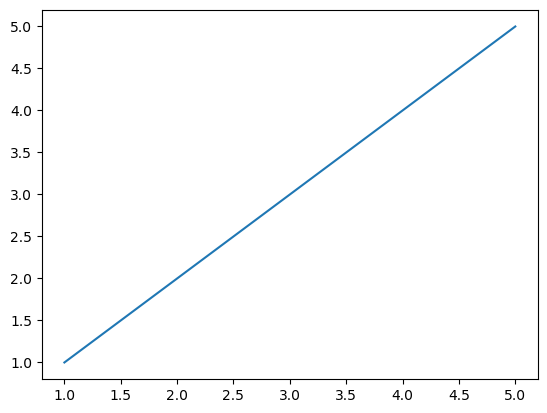

In [6]:
plt.plot(a,b)
plt.show()

We can make the graph look even nicer by adding some titles to it:

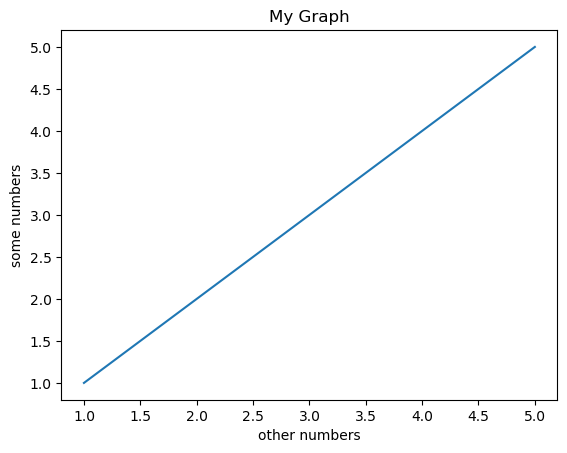

In [7]:
plt.plot(a,b)
plt.title('My Graph')
plt.ylabel('some numbers')
plt.xlabel('other numbers')
plt.show()

## Pandas

In addition to Numpy, we use Pandas to help us manipulate large datasets in Python.    Pandas make it very easy to load and save data to and from files in our notebook.   Or as Wikipedia says:

_"In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license."_

In [8]:
import pandas as pd

Let's use Pandas to load some data into our running notebook environment:

In [9]:
df = pd.read_csv("data.csv")
df.head()

,Height,Food
0,16.74,18.69
1,11.43,12.12
2,10.00,13.75
3,19.47,18.71
4,12.35,15.85


And now let's use Pandas (which in turn uses Matplotlib) to graph the data:

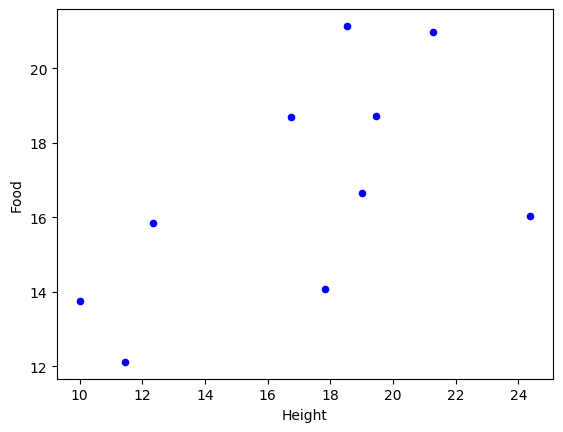

In [13]:
df.plot(kind='scatter',x='Height',y='Food',color='blue')
plt.show()

## scikit-learn

This is where the serious business starts.  Scikit-learn is a machine learning library developed for Python.  Scikit-learn has all the tools we need to be able to create algorithms, train models, and make inferences.  In addition to this, scikit-learn also has many algorithms built-in, so we can get started very quickly.    

_(Heard of TensorFlow?  Well, scikit-learn is the same kind of thing, except its often a little easier to get started with.)_

In [14]:
import sklearn.linear_model

First, let's load a linear learner algorithm object straight out of scikit-learn.

In [15]:
model = sklearn.linear_model.LinearRegression()

Now we call 'fit' on that algorithm passing in the training data.  Take a look at how the data is passed in.   First, we pass a list of 'features'.  We only have one feature, 'height', so why do we use a list?  Next, we pass in our 'label' which in our case is 'food', this is not a list, why?

In [16]:
model.fit(df[['Height']], df['Food'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Great, our model is now trained on our data.  Now what?  Well, we can weave some code to draw both our data points and the model line on a graph.  Don't worry about the details of how this is done, but, the code is here for you to look through:

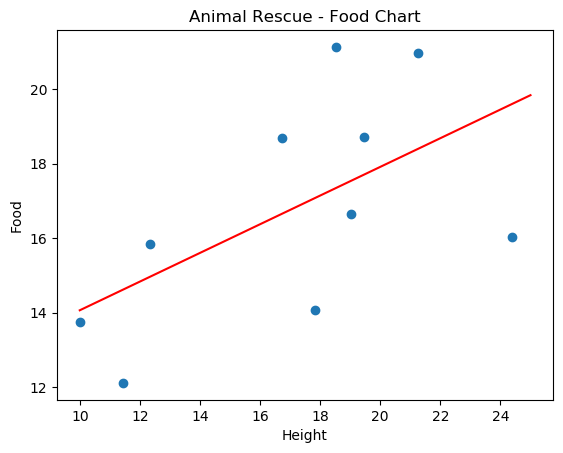

In [17]:
axes = plt.axes()

# Plot the data points:
axes.scatter(x=df['Height'], y=df['Food'])

# Get the slope and the x intercept of the model line:
slope = model.coef_[0]
intercept = model.intercept_

# Plot the line (remember y=mx+c?):
x = np.linspace(10,25)
y = slope*x+intercept
axes.plot(x, y, 'r')

# Make the graph look nice:
plt.title('Animal Rescue - Food Chart')
axes.set_xlabel('Height')
axes.set_ylabel('Food')

plt.show()

Finally, let's use our model to make predictions about new dogs:

In [19]:
height = 22

# scikit-learn expects a list of lists:
h = [[height]]

# Call predict to get the prediction, note the output is also a list:
food = model.predict(h)[0]

# Print the information back to the user
print ( "A dog of height %.2f will eat %.2f food!" % (height, food))

A dog of height 22.00 will eat 18.69 food!


Congratulations, you created a machine learning model!  The first of many :)